<a href="https://colab.research.google.com/github/dipucriodigital/ciencia-de-dados-e-analytics/blob/main/machine-learning/ML_Aula3b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Sprint #2
## Qualidade de Software, Segurança e Sistemas Inteligentes 
### Yoko Lucila Takano

## Environment Configuration

In [1]:
# Settings to disable warnings
import warnings
warnings.filterwarnings("ignore")

# Required imports
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

## Dataset Loading

Worldwide, breast cancer is the most common type of cancer in women and the second highest in terms of mortality rates. Diagnosis of breast cancer is performed when an abnormal lump is found (from self-examination or x-ray) or a tiny speck of calcium is seen (on an x-ray). After a suspicious lump is found, the doctor will conduct a diagnosis to determine whether it is cancerous and, if so, whether it has spread to other parts of the body.

This breast cancer dataset was obtained from the University of Wisconsin Hospitals, Madison from Dr. William H. Wolberg.


Columns Description:
- Mean Radius: The average radius of cell nuclei in the sample, representing the size of the cells.
- Mean Texture: The average variation in pixel intensity, indicating the texture or smoothness of the cell surface.
- Mean Perimeter: The average perimeter of the cell nuclei, indicating the boundary length of the cells.
- Mean Area: The average area of the cell nuclei, representing the space occupied by the cells.
- Mean Smoothness: The average measure of the smoothness of the cell nuclei, calculated from local variations in radius lengths.
- Diagnosis: The target variable, where 0 indicates benign and 1 indicates malignant breast cancer.

The goal of this machine learning model is to predict whether a person has breast cancer based on the characteristics of their tumor cells.


In [4]:
# Specify the URL to import the dataset
url = "https://raw.githubusercontent.com/yoko-takano/breast-cancer-dataset/main/raw_breast_cancer_data.csv"

# Load the dataset from the URL
dataset = pd.read_csv(url, delimiter=',')

# Display the first few rows of the dataset
dataset.head()

# Display the descriptive statistics of the dataset
dataset.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [5]:
# Display the summary information of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


## Split the dataset into training and testing sets using houldout method

In [8]:
test_size = 0.20  # Size of the test set
seed = 7  # Random seed

# Split the database into training and testing sets
array = dataset.values
X = array[:, 0:5]  # Features
y = array[:, 5]  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # Holdout with stratification

# Parameters and partitions for cross-validation
scoring = 'accuracy'
num_partitions = 10

# Cross-validation with stratification
k_fold = StratifiedKFold(n_splits=num_partitions, shuffle=True, random_state=seed)

## Model Building and Evaluation

### Creating and evaluating baseline models

LR: 0.914106 (0.042707)
KNN: 0.892174 (0.043597)
CART: 0.894541 (0.043778)
NB: 0.885459 (0.053511)
SVM: 0.876763 (0.043592)
Bagging: 0.927440 (0.026432)
RF: 0.920821 (0.030093)
ET: 0.925217 (0.028485)
Ada: 0.927488 (0.029662)
GB: 0.920870 (0.031577)
Voting: 0.922899 (0.033566)


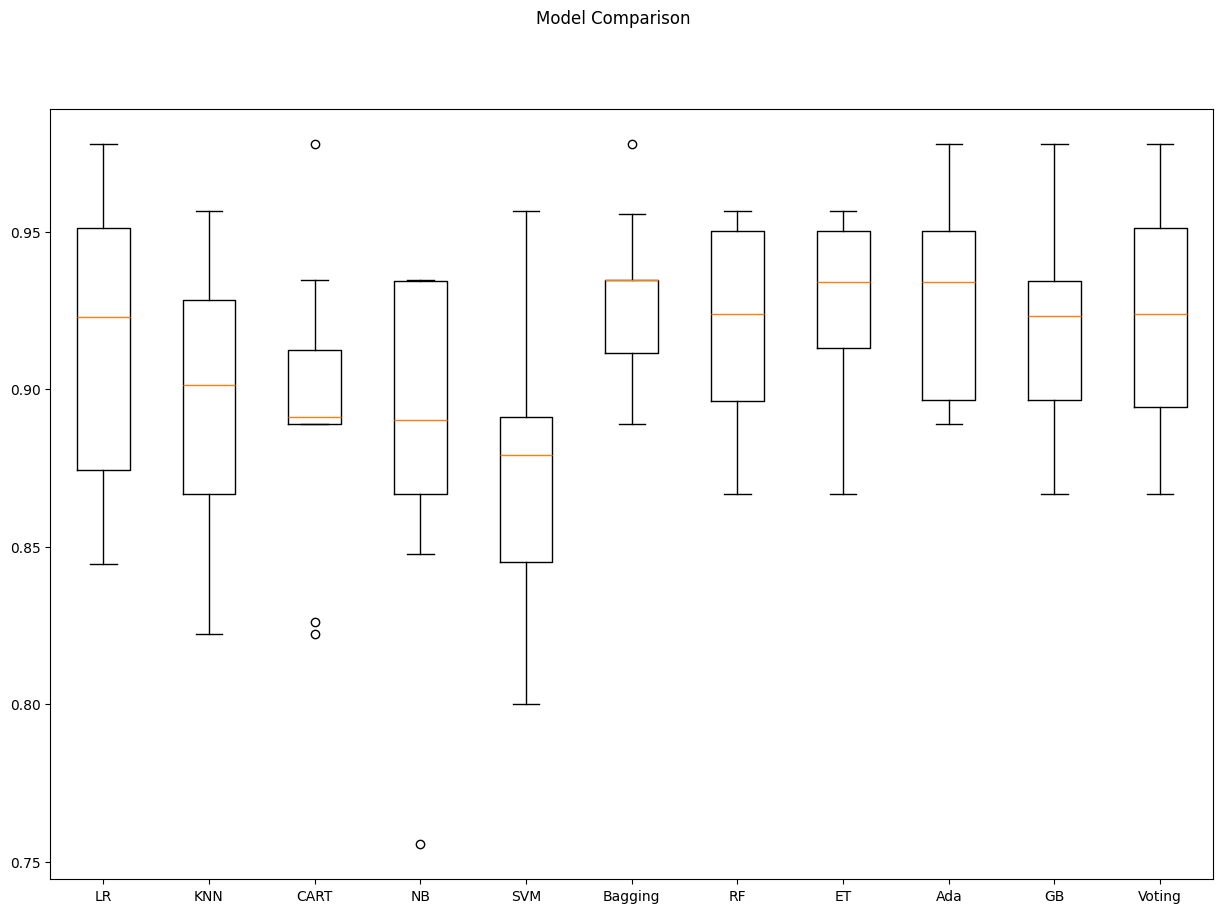

In [11]:
# The seed is necessary to ensure the reproducibility of this code
np.random.seed(7)  # Setting a global seed for reproducibility

# List to store different models
models = [('LR', LogisticRegression(max_iter=200)), ('KNN', KNeighborsClassifier()), ('CART', DecisionTreeClassifier()),
          ('NB', GaussianNB()), ('SVM', SVC())]

# Creating and adding models to the list

# Defining parameters for the base classifier in the BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Creating models for VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Creating ensembles and adding them to the models list
models.append(('Bagging', BaggingClassifier(estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Lists to store results
results = []
names = []

# Model evaluation (training)
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=k_fold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot to compare model performance
fig = plt.figure(figsize=(15,10)) 
fig.suptitle('Model Comparison') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names) 
plt.show()

# Best result is AdaBoost, performing with 0.9275 accuracy and 0.0297 std deviation

### Model creation and evaluation: standardized and normalized data

LR-orig: 0.914 (0.043)
KNN-orig: 0.892 (0.044)
CART-orig: 0.895 (0.044)
NB-orig: 0.885 (0.054)
SVM-orig: 0.877 (0.044)
Bag-orig: 0.927 (0.026)
RF-orig: 0.921 (0.030)
ET-orig: 0.925 (0.028)
Ada-orig: 0.927 (0.030)
GB-orig: 0.921 (0.032)
Vot-orig: 0.923 (0.034)
LR-padr: 0.925 (0.042)
KNN-padr: 0.919 (0.037)
CART-padr: 0.903 (0.040)
NB-padr: 0.897 (0.046)
SVM-padr: 0.930 (0.035)
Bag-padr: 0.930 (0.031)
RF-padr: 0.914 (0.038)
ET-padr: 0.925 (0.027)
Ada-padr: 0.927 (0.030)
GB-padr: 0.921 (0.032)
Vot-padr: 0.930 (0.039)
LR-norm: 0.919 (0.040)
KNN-norm: 0.919 (0.042)
CART-norm: 0.894 (0.047)
NB-norm: 0.897 (0.046)
SVM-norm: 0.925 (0.032)
Bag-norm: 0.921 (0.030)
RF-norm: 0.921 (0.026)
ET-norm: 0.930 (0.024)
Ada-norm: 0.927 (0.030)
GB-norm: 0.921 (0.030)
Vot-norm: 0.927 (0.034)


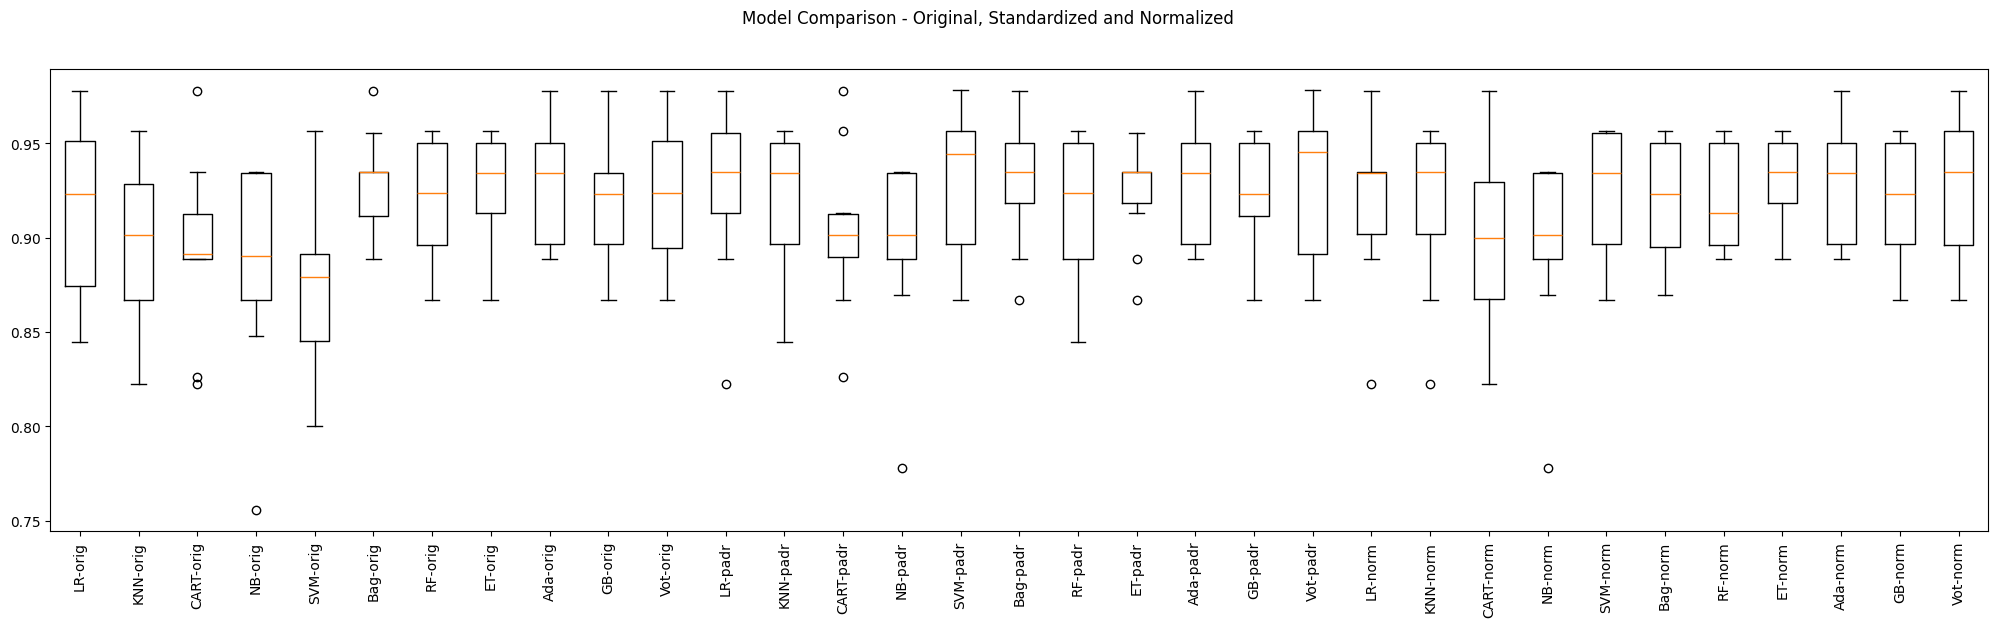

In [12]:
np.random.seed(7)  # Setting a global seed for this block

# List to store pipelines and results for all dataset views
pipelines = []
results = []
names = []

# Creating pipeline elements

# Algorithms to be used
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformations to be used
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Setting up the pipelines
# The order of execution is from left to right

# Original dataset
pipelines.append(('LR-orig', Pipeline([reg_log]))) 
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Standardized dataset
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log]))) 
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging]))) 
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Normalized dataset
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log]))) 
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging]))) 
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Running the pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=k_fold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatting to 3 decimal
    print(msg)

# Comparison boxplot of the models
fig = plt.figure(figsize=(25,6))
fig.suptitle('Model Comparison - Original, Standardized and Normalized') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names, rotation=90)
plt.show()

# Best result is ET-norm, with 0.930 accuracy and 0.024 std deviation

### Hyperparameters optimization

In [13]:
np.random.seed(7)  # Setting a global seed for this block

# List of models
models = [('LR', LogisticRegression(max_iter=200)), ('KNN', KNeighborsClassifier()), ('CART', DecisionTreeClassifier()),
          ('NB', GaussianNB()), ('SVM', SVC())]

# Creating models and adding them to the list of models

# Setting the base parameters for the BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Creating models for the VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Creating ensembles and adding them to the list of models
models.append(('Bagging', BaggingClassifier(estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(estimators=bases, voting='hard')))

# Defining the components of the pipeline
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

# List of pipelines
pipelines = []

# Creating pipelines for each model
for name, model in models:
    pipelines.append((name + '-orig', Pipeline(steps=[(name, model)])))
    pipelines.append((name + '-padr', Pipeline(steps=[standard_scaler, (name, model)])))
    pipelines.append((name + '-norm', Pipeline(steps=[min_max_scaler, (name, model)])))

# Defining parameters for GridSearchCV
param_grids = {
    'LR': {
        'LR__C': [0.01, 0.1, 1, 10, 100],
        'LR__solver': ['liblinear', 'saga']
    },
    'KNN': {
        'KNN__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
        'KNN__metric': ["euclidean", "manhattan", "minkowski"]
    },
    'CART': {
        'CART__max_depth': [None, 10, 20, 30, 40, 50],
        'CART__min_samples_split': [2, 5, 10],
        'CART__min_samples_leaf': [1, 2, 4]
    },
    'NB': {
        'NB__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
    },
    'SVM': {
        'SVM__C': [0.1, 1, 10, 100],
        'SVM__gamma': [1, 0.1, 0.01, 0.001],
        'SVM__kernel': ['rbf', 'linear']
    },
    'RF': {
        'RF__n_estimators': [10, 50, 100, 200],
        'RF__max_features': ['auto', 'sqrt', 'log2'],
        'RF__max_depth': [None, 10, 20, 30],
        'RF__min_samples_split': [2, 5, 10],
        'RF__min_samples_leaf': [1, 2, 4]
    },
    'ET': {
        'ET__n_estimators': [10, 50, 100, 200],
        'ET__max_features': ['auto', 'sqrt', 'log2'],
        'ET__max_depth': [None, 10, 20, 30],
        'ET__min_samples_split': [2, 5, 10],
        'ET__min_samples_leaf': [1, 2, 4]
    },
    'Ada': {
        'Ada__n_estimators': [10, 50, 100, 200],
        'Ada__learning_rate': [0.01, 0.1, 1, 10]
    },
    'GB': {
        'GB__n_estimators': [10, 50, 100, 200],
        'GB__learning_rate': [0.01, 0.1, 0.2, 0.3],
        'GB__max_depth': [3, 5, 7, 9]
    },
    'Voting': {
        # For VotingClassifier, there are generally no hyperparameters to adjust directly
        # Adjust the hyperparameters of the individual base estimators if needed
    }
}

# Cross-validation parameters and scoring
scoring = 'accuracy'
k_fold = 5

# Running GridSearchCV for each pipeline
for name, pipeline in pipelines:
    model_type = name.split('-')[0]
    if model_type in param_grids:
        param_grid = param_grids[model_type]
    else:
        param_grid = {}  # For models with no defined parameters

    grid = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring=scoring, cv=k_fold)
    grid.fit(X_train, y_train)
    # Printing the best configuration
    print("Model: %s - Best: %f using %s" % (name, grid.best_score_, grid.best_params_))
    
    # Best result is RF-norm, with 0.9429 accuracy using max_depth=10, n_estimators=10, min_samples_leaf=2
    # It takes about 13 minutes to finish

Model: LR-orig - Best: 0.923077 using {'LR__C': 100, 'LR__solver': 'liblinear'}
Model: LR-padr - Best: 0.936264 using {'LR__C': 100, 'LR__solver': 'liblinear'}
Model: LR-norm - Best: 0.929670 using {'LR__C': 100, 'LR__solver': 'liblinear'}
Model: KNN-orig - Best: 0.892308 using {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 11}
Model: KNN-padr - Best: 0.938462 using {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 13}
Model: KNN-norm - Best: 0.936264 using {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 15}
Model: CART-orig - Best: 0.903297 using {'CART__max_depth': None, 'CART__min_samples_leaf': 1, 'CART__min_samples_split': 2}
Model: CART-padr - Best: 0.901099 using {'CART__max_depth': 20, 'CART__min_samples_leaf': 1, 'CART__min_samples_split': 2}
Model: CART-norm - Best: 0.907692 using {'CART__max_depth': 10, 'CART__min_samples_leaf': 2, 'CART__min_samples_split': 5}
Model: NB-orig - Best: 0.892308 using {'NB__var_smoothing': 1e-09}
Model: NB-padr - Best: 0.896703 using {'NB__va

In [ ]:
# Model: LR-orig - Best: 0.923077 using {'LR__C': 100, 'LR__solver': 'liblinear'}
# Model: LR-padr - Best: 0.936264 using {'LR__C': 100, 'LR__solver': 'liblinear'}
# Model: LR-norm - Best: 0.929670 using {'LR__C': 100, 'LR__solver': 'liblinear'}
# Model: KNN-orig - Best: 0.892308 using {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 11}
# Model: KNN-padr - Best: 0.938462 using {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 13}
# Model: KNN-norm - Best: 0.936264 using {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 15}
# Model: CART-orig - Best: 0.903297 using {'CART__max_depth': None, 'CART__min_samples_leaf': 1, 'CART__min_samples_split': 2}
# Model: CART-padr - Best: 0.901099 using {'CART__max_depth': 20, 'CART__min_samples_leaf': 1, 'CART__min_samples_split': 2}
# Model: CART-norm - Best: 0.907692 using {'CART__max_depth': 10, 'CART__min_samples_leaf': 2, 'CART__min_samples_split': 5}
# Model: NB-orig - Best: 0.892308 using {'NB__var_smoothing': 1e-09}
# Model: NB-padr - Best: 0.896703 using {'NB__var_smoothing': 1e-09}
# Model: NB-norm - Best: 0.896703 using {'NB__var_smoothing': 1e-09}
# Model: SVM-orig - Best: 0.931868 using {'SVM__C': 100, 'SVM__gamma': 1, 'SVM__kernel': 'linear'}
# Model: SVM-padr - Best: 0.938462 using {'SVM__C': 1, 'SVM__gamma': 0.1, 'SVM__kernel': 'rbf'}
# Model: SVM-norm - Best: 0.934066 using {'SVM__C': 100, 'SVM__gamma': 1, 'SVM__kernel': 'rbf'}
# Model: Bagging-orig - Best: 0.931868 using {}
# Model: Bagging-padr - Best: 0.934066 using {}
# Model: Bagging-norm - Best: 0.923077 using {}
# Model: RF-orig - Best: 0.938462 using {'RF__max_depth': None, 'RF__max_features': 'sqrt', 'RF__min_samples_leaf': 4, 'RF__min_samples_split': 5, 'RF__n_estimators': 10}
# Model: RF-padr - Best: 0.938462 using {'RF__max_depth': 10, 'RF__max_features': 'sqrt', 'RF__min_samples_leaf': 2, 'RF__min_samples_split': 10, 'RF__n_estimators': 10}
# Model: RF-norm - Best: 0.942857 using {'RF__max_depth': 10, 'RF__max_features': 'sqrt', 'RF__min_samples_leaf': 2, 'RF__min_samples_split': 2, 'RF__n_estimators': 10}
# Model: ET-orig - Best: 0.940659 using {'ET__max_depth': None, 'ET__max_features': 'sqrt', 'ET__min_samples_leaf': 1, 'ET__min_samples_split': 2, 'ET__n_estimators': 10}
# Model: ET-padr - Best: 0.938462 using {'ET__max_depth': 20, 'ET__max_features': 'sqrt', 'ET__min_samples_leaf': 1, 'ET__min_samples_split': 5, 'ET__n_estimators': 50}
# Model: ET-norm - Best: 0.942857 using {'ET__max_depth': None, 'ET__max_features': 'log2', 'ET__min_samples_leaf': 1, 'ET__min_samples_split': 5, 'ET__n_estimators': 50}
# Model: Ada-orig - Best: 0.936264 using {'Ada__learning_rate': 0.1, 'Ada__n_estimators': 200}
# Model: Ada-padr - Best: 0.936264 using {'Ada__learning_rate': 0.1, 'Ada__n_estimators': 200}
# Model: Ada-norm - Best: 0.936264 using {'Ada__learning_rate': 0.1, 'Ada__n_estimators': 200}
# Model: GB-orig - Best: 0.936264 using {'GB__learning_rate': 0.2, 'GB__max_depth': 3, 'GB__n_estimators': 50}
# Model: GB-padr - Best: 0.936264 using {'GB__learning_rate': 0.2, 'GB__max_depth': 3, 'GB__n_estimators': 50}
# Model: GB-norm - Best: 0.936264 using {'GB__learning_rate': 0.2, 'GB__max_depth': 3, 'GB__n_estimators': 50}
# Model: Voting-orig - Best: 0.923077 using {}
# Model: Voting-padr - Best: 0.934066 using {}
# Model: Voting-norm - Best: 0.931868 using {}

In [14]:
# Tuning do KNN

np.random.seed(7)  # Setting a global seed for this block

pipelines = []

# Defining the pipeline components
knn = ('KNN', KNeighborsClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('knn-orig', Pipeline(steps=[knn])))
pipelines.append(('knn-padr', Pipeline(steps=[standard_scaler, knn])))
pipelines.append(('knn-norm', Pipeline(steps=[min_max_scaler, knn])))

param_grid = {
    'KNN__n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
    'KNN__metric': ["euclidean", "manhattan", "minkowski"],
}

# Prepares and executes the GridSearchCV
for name, model in pipelines:    
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=k_fold)
    grid.fit(X_train, y_train)
    # Prints the best configuration
    print("No missing treatment: %s - Best: %f using %s" % (name, grid.best_score_, grid.best_params_)) 

No missing treatment: knn-orig - Best: 0.892308 using {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 11}
No missing treatment: knn-padr - Best: 0.938462 using {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 13}
No missing treatment: knn-norm - Best: 0.936264 using {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 15}


## Model Finalization

In [16]:
# Evaluating the model with the test set
# Best model

np.random.seed(7)

# Model preparation
scaler = MinMaxScaler().fit(X_train)
rescaledX = scaler.transform(X_train)  # Applying normalization to the training set
model = RandomForestClassifier(n_estimators=10, 
                               max_depth=10,
                               min_samples_leaf=2,
                               min_samples_split=2,
                               max_features='sqrt')
model.fit(rescaledX, y_train)

# Accuracy estimation on the test set
rescaledTestX = scaler.transform(X_test)  # Applying normalization to the test set
predictions = model.predict(rescaledTestX)
print(f"Test Accuracy: {accuracy_score(y_test, predictions):.6f}")

Test Accuracy: 0.921053


## Running the model from a pipeline with optimized hyperparameters

In [17]:
np.random.seed(7)

model = RandomForestClassifier(n_estimators=10, 
                               max_depth=10,
                               min_samples_leaf=2,
                               min_samples_split=2,
                               max_features='sqrt')

pipeline = Pipeline(steps=[('MinMaxScaler', MinMaxScaler()), ('RF', model)])

pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)
print(accuracy_score(y_test, predictions))

0.9210526315789473


## Saving the files

In [18]:
# Saving the model
model_filename = 'rf_breast_cancer_classifier.pkl'
with open("../models/"+model_filename, 'wb') as file:
    pickle.dump(model, file)

# Saving the scaler
scaler_filename = 'min_max_scaler_breast_cancer.pkl'
with open("../scalers/"+scaler_filename, 'wb') as file:
    pickle.dump(scaler, file)
    
# Saving the pipeline
pipeline_filename = 'rf_breast_cancer_pipeline.pkl'
with open("../pipelines/"+pipeline_filename, 'wb') as file:
    pickle.dump(pipeline, file)
    
# Saving X_test and y_test
X_test_df = pd.DataFrame(X_test, columns=dataset.columns[:-1])
y_test_df = pd.DataFrame(y_test, columns=[dataset.columns[-1]])
X_test_df.to_csv("../data/x_test_dataset_breast_cancer.csv", index=False)
y_test_df.to_csv("../data/y_test_dataset_breast_cancer.csv", index=False)


## Simulating the application of the model on unseen data

In [19]:
# Preparing the model with the ENTIRE dataset
scaler = MinMaxScaler().fit(X)  # fitting the scaler with the ENTIRE dataset
rescaledX = scaler.transform(X)  # applying normalization with the ENTIRE dataset
model.fit(rescaledX, y)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=10)

In [20]:
# New data
data = {'mean_radius':  [17.013, 15.315, 20.643],
        'mean_texture': [10.329, 17.777, 19.908],
        'mean_perimeter': [122.394, 130.001, 103.601],
        'mean_area': [1001.0, 1326.0, 477.1],
        'mean_smoothness': [0.1135, 0.1423, 0.08423],
        }

attributes = ['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness']
input_entry = pd.DataFrame(data, columns=attributes)

array_entry = input_entry.values
X_input = array_entry[:,0:5].astype(float)

# Standardizing the input data using the scaler used in X
rescaledInputX = scaler.transform(X_input)
print(rescaledInputX)

[[0.47479767 0.02093338 0.54318292 0.36373277 0.54951702]
 [0.39443419 0.27281028 0.59575012 0.50159067 0.80951521]
 [0.64659946 0.34487656 0.41331629 0.14150583 0.2852758 ]]


In [21]:
# Predicting classes for the input data
output = model.predict(rescaledInputX)
print(output)

[0. 0. 0.]
